# Shifting traditions: change in attitude of print laborers in The Netherlands 1820-1870

In [1]:
import pandas as pd
import numpy as np

liedjesDF = pd.read_csv("../../data/liedjes/liedjes.csv", dtype={'jaartal': 'Int32'})
boekjesDF = pd.read_csv('../../data/liedjes/boekjes.csv')
prentenDF = pd.read_csv("../../data/koppermaandagprentenCount.csv", index_col="year")

<AxesSubplot: xlabel='jaartal'>

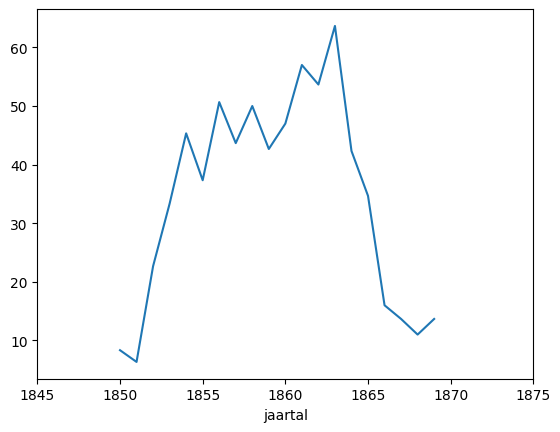

In [2]:
count = liedjesDF.groupby('jaartal').size()
count_rm = count.rolling(3).mean()
count_rm.plot(xlim=(1845,1875))


In [3]:
boekjesSELECT = boekjesDF.loc[boekjesDF['size'] < 50].loc[boekjesDF['size'] > 2]


<AxesSubplot: xlabel='year'>

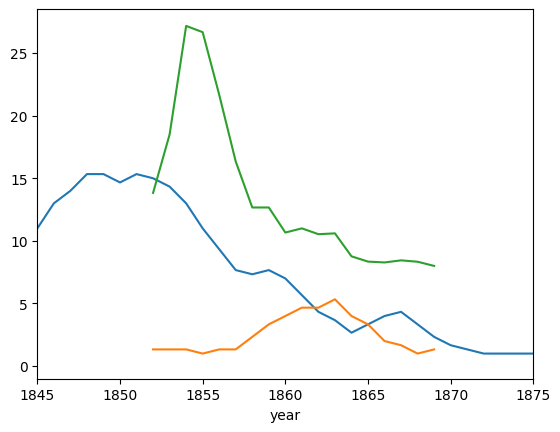

In [4]:
prentenSeries = prentenDF['count']
prentenSeries_rm = prentenSeries.rolling(3).mean()
prentenSeries_rm.plot(xlim = (1845,1875))

boekjesCNT = boekjesSELECT.groupby('year').size()
boekjesCNT_rm = boekjesCNT.rolling(3).mean()
boekjesCNT_rm.plot()

boekjesSUM = boekjesSELECT.groupby('year').sum('size')
boekjesXL = boekjesSUM.merge(boekjesCNT.rename('count'), left_index=True, right_index=True) 

boekjesAVG = boekjesXL['size'] / boekjesXL['count']
boekjesAVG_rm = boekjesAVG.rolling(3).mean()
boekjesAVG_rm.plot()
